In [1]:
import xarray as xr
import numpy as np
# import glob
from matplotlib import pyplot as plt
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import sys
sys.path.append("/Users/ccamargo/Documents/py_scripts/")
import utils_SL as sl

import cmocean 

cmap = cmocean.cm.balance

def plot_map( data,
             lon=np.arange(0,360),lat=np.arange(-90,90),
             cmap='tab10',
             cmin=0,cmax=9,
             fsize=(15,10),
             proj='robin',
             land=True,
             grid=True,
             title='',
             clabel='',
             lon0=0,
             extent = False
             ) :
    
   

    plt.figure(figsize=(15,10),dpi=100)
    if proj=='robin':
        proj=ccrs.Robinson(central_longitude=lon0)
    else:
        proj=ccrs.PlateCarree()
    ax = plt.subplot(111, projection=proj
                     #Mercator()
                     )
    #ax.background_img(name='pop', resolution='high')
    if extent:    
        ax.set_extent(extent,ccrs.PlateCarree())
    else:
        ax.set_global()
    ##             min_lon,,max_lon,minlat,maxlat
    mm = ax.pcolormesh(lon,\
                       lat,\
                       data,
                       vmin=cmin, vmax=cmax, 
                       transform=ccrs.PlateCarree(),
                       #cmap='Spectral_r'
                       cmap=cmap
                      )
    if land:
        landcolor='papayawhip'
        
        # ax.add_feature(cfeature.LAND, facecolor=landcolor)
      
        ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='gray', facecolor=landcolor))
       
        # resol = '50m'  # use data at this scale
       
        # land = cfeature.NaturalEarthFeature('physical', 'land', scale=resol, edgecolor='k', facecolor=cfeature.COLORS['land'])
        # ax.add_feature(land, facecolor='beige')

        
    # d01 box
    if grid:
        gl=ax.gridlines(draw_labels=True)
        gl.top_labels = False
        gl.right_labels = False
        # gl.xformatter = LONGITUDE_FORMATTER
        # gl.yformatter = LATITUDE_FORMATTER
    plt.colorbar(mm,label=clabel,orientation='horizontal',
                     shrink=0.9)
    plt.title(title,fontsize=20)

#    plt.show()
    # plt.close()    
    return

def plot_map_contour( data, contour,
             lon=np.arange(0,360),lat=np.arange(-90,90),
             cmap='tab10',
             cmin=0,cmax=9,
             fsize=(15,10),
             proj='robin',
             land=True,
             grid=True,
             title='',
             clabel='',
             lon0=0,
             extent = False
             ) :
    
   

    plt.figure(figsize=(15,10),dpi=100)
    if proj=='robin':
        proj=ccrs.Robinson(central_longitude=lon0)
    else:
        proj=ccrs.PlateCarree()
    ax = plt.subplot(111, projection=proj
                     #Mercator()
                     )
    #ax.background_img(name='pop', resolution='high')
    if extent:    
        ax.set_extent(extent,ccrs.PlateCarree())
    else:
        ax.set_global()
    ##             min_lon,,max_lon,minlat,maxlat
    mm = ax.pcolormesh(lon,\
                       lat,\
                       data,
                       vmin=cmin, vmax=cmax, 
                       transform=ccrs.PlateCarree(),
                       #cmap='Spectral_r'
                       cmap=cmap
                      )
    plt.contour(lon,lat,contour,colors='black',levels=np.arange(1,np.nanmax(contour)+1,1),linewidths=0.25,zorder=1,
                transform=ccrs.PlateCarree()
               )

    if land:
        landcolor='lightgrey'
        
        # ax.add_feature(cfeature.LAND, facecolor=landcolor)
      
        ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor=landcolor, facecolor=landcolor))
       
        # resol = '50m'  # use data at this scale
       
        # land = cfeature.NaturalEarthFeature('physical', 'land', scale=resol, edgecolor='k', facecolor=cfeature.COLORS['land'])
        # ax.add_feature(land, facecolor='beige')

        
    # d01 box
    if grid:
        gl=ax.gridlines(draw_labels=True)
        gl.top_labels = False
        gl.right_labels = False
        # gl.xformatter = LONGITUDE_FORMATTER
        # gl.yformatter = LATITUDE_FORMATTER
    plt.colorbar(mm,label=clabel,orientation='horizontal',
                     shrink=0.9)
    plt.title(title,fontsize=20)

#    plt.show()
    # plt.close()    
    return

def plot_map_pcontour( data,
             lon=np.arange(0,360),lat=np.arange(-90,90),
             cmap='tab10',
             cmin=0,cmax=9,
                     interval=1,
             fsize=(15,10),
             proj='robin',
             land=True,
             grid=True,
             title='',
             clabel='',
             lon0=205,
             landcolor='papayawhip',
             extent = False
             ) :
    plt.figure(figsize=fsize,dpi=100)
    proj=ccrs.Robinson(central_longitude=lon0)
    ax = plt.subplot(111, projection=proj
                     )
    ax.set_global()
    mm=ax.pcolormesh(lon,lat,data,cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='gray', facecolor=landcolor))

        # resol = '50m'  # use data at this scale

        # land = cfeature.NaturalEarthFeature('physical', 'land', scale=resol, edgecolor='k', facecolor=cfeature.COLORS['land'])
        # ax.add_feature(land, facecolor='beige')
    cf=plt.contourf(lon,lat,data,cmap=cmap,levels=np.arange(cmin,cmax+1,interval),zorder=1,
                    transform=ccrs.PlateCarree()
                   )

    plt.colorbar(cf,orientation='horizontal',shrink=0.8)
    plt.title(title)
    plt.show()
    
    return

def cluster_mean(data,mask,
                 time=[0],
                 lat=[0],
                 lon=[0],
                 norm=True,
                 stats='mean'):
    ''' 
    Function to compute mean, min max time series of a dataset, given a mask
    If norm=True, then data is normalized by range before computing mean,min,max
    returns a time series which has mean on axis 0, min on axis 1 and max on axis 2
    '''
    dims=data.shape
    if len(lat)!=dims[1]:
        lat = np.arange(0,dims[1])
    if len(lon)!=dims[2]:
        lon=np.arange(0,dims[2])
    if len(time)!=dims[0]:
        time = np.arange(0,dims[0])
    da = xr.Dataset(data_vars={'data':(('time','lat','lon'),data*mask),                          
                           },
                coords={'lat':lat,
                        'lon':lon,
                        'time':time,
                        }
                )
    if norm:
        da['data']=da.data - da.data.mean()
    if stats =='all':
        time_series=np.zeros((3,dims[0]))
        time_series[0,:] = da.data.mean(dim=('lat','lon')).data 
        time_series[1,:] = da.data.min(dim=('lat','lon')).data
        time_series[2,:] = da.data.max(dim=('lat','lon')).data
    elif stats=='mean':
        time_series = da.data.mean(dim=('lat','lon')).data 

    
    return time_series

#%%
def cluster_trend(data,mask,
                 time=[0],
                 lat=[0],
                 lon=[0],
                 norm=True,
                 stats='mean'):
    ''' 
    given a dataset with dimensions time,lat,lon and a mask, compute the trend in this mask
    '''
    dims=data.shape
    if len(dims)==3:
        dimtime,dimlat,dimlon=data.shape
        if len(time)!=dimtime:
            time = np.arange(0,dimtime)
    else:
        dimlat,dimlon=data.shape
    if len(lat)!=dimlat:
        lat = np.arange(0,dimlat)
    if len(lon)!=dimlon:
        lon=np.arange(0,dimlon)


    # trend, error, acc,trend_with_error,std_trend = sl.get_OLS_trend(time,y=data*mask,lat=lat,lon=lon)
    trend, _ = sl.get_reg_trend(time, data*mask, lat, lon)

    
    return trend

def cluster_budget(data,mask,
                 ):
    ''' 

    '''
    
    return data*mask




In [2]:
#%% budget componenets file
path = '/Users/ccamargo/Desktop/budget/data/'
file = 'SLA_alt+comps_1993-2016_trends.nc'

da=xr.open_dataset(path+file)
var=np.array(da.contribution)
tdec, _ = sl.get_dec_time(da.time)


# Budget on indopacific and  Atlantic

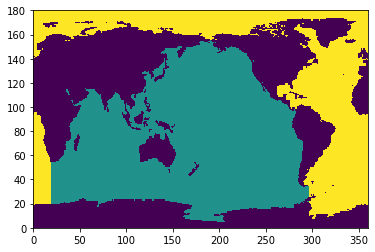

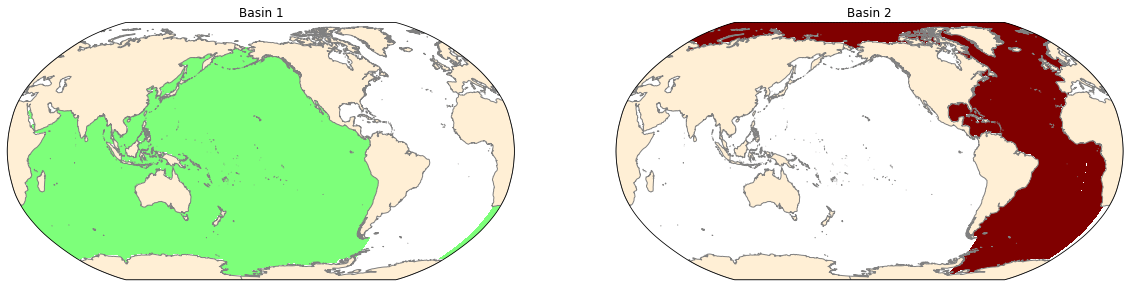

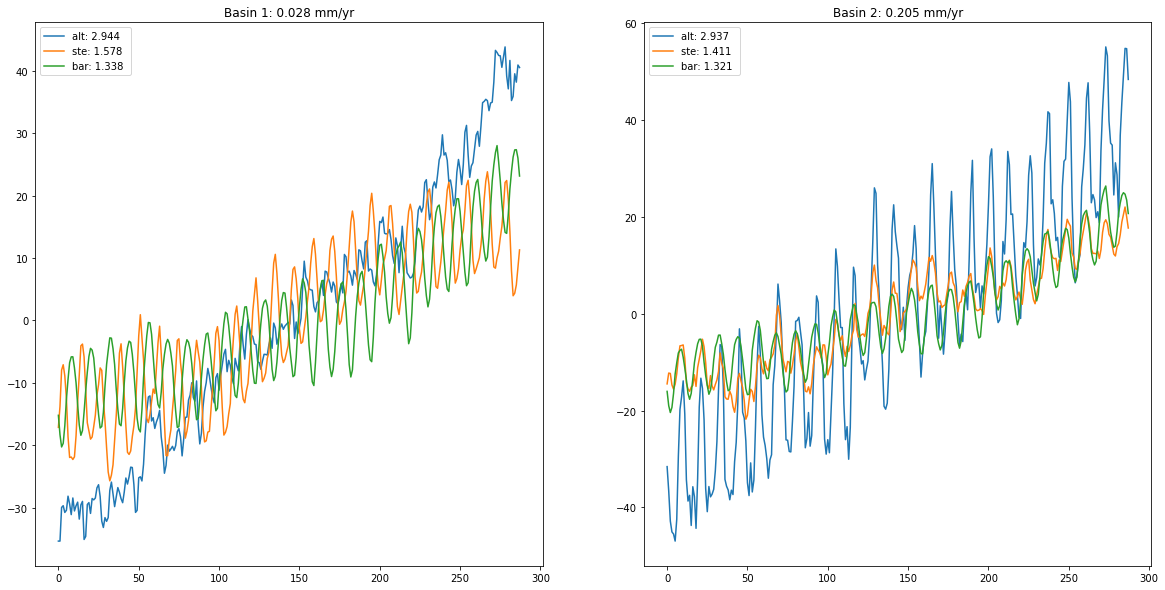

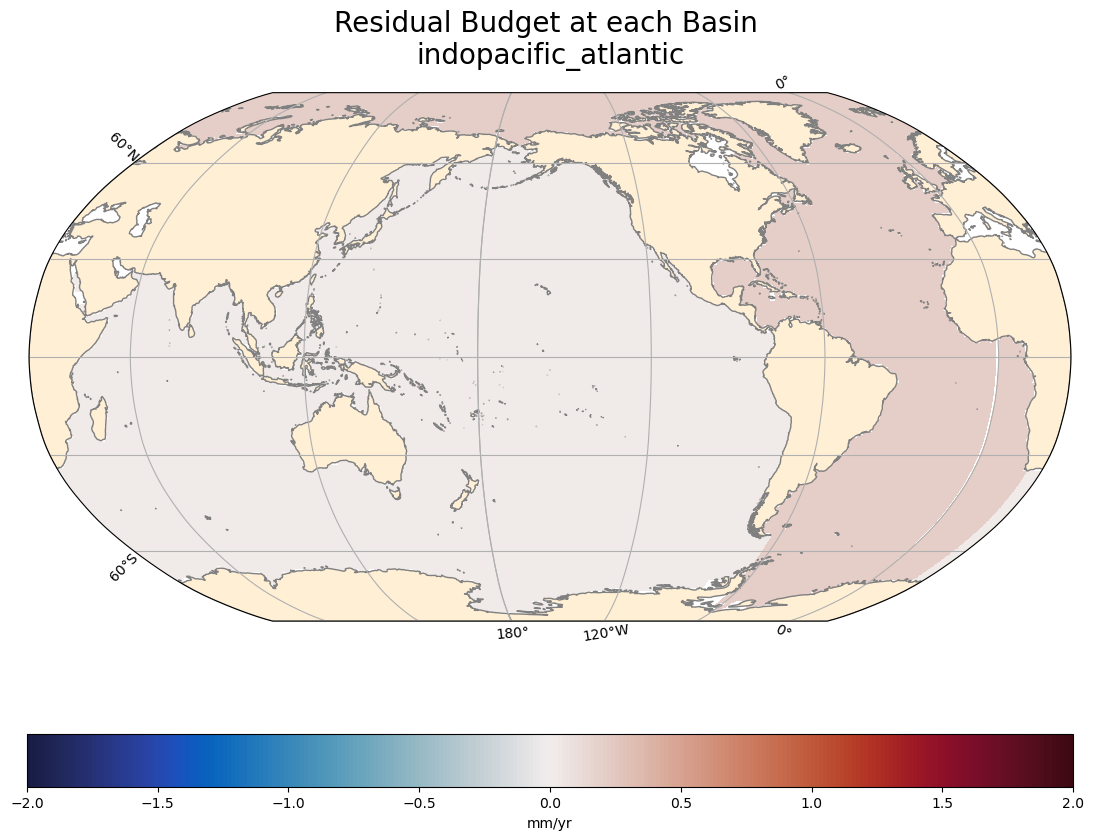

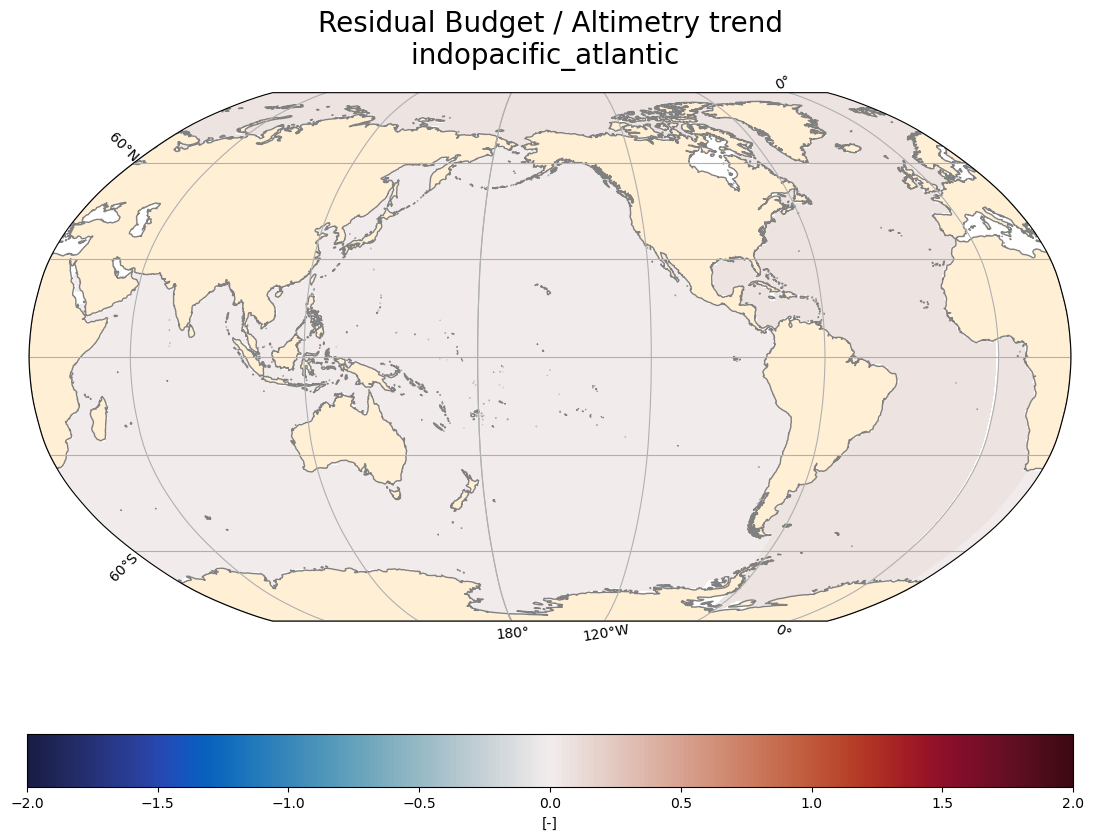

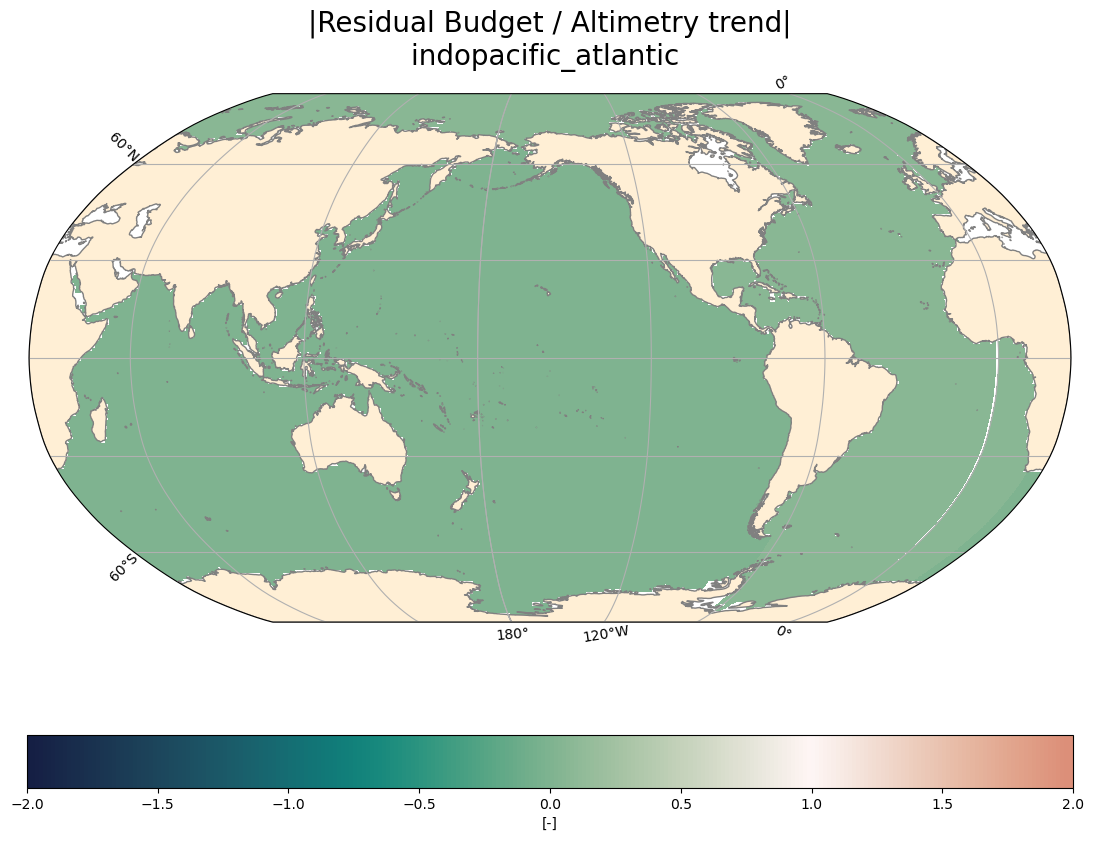

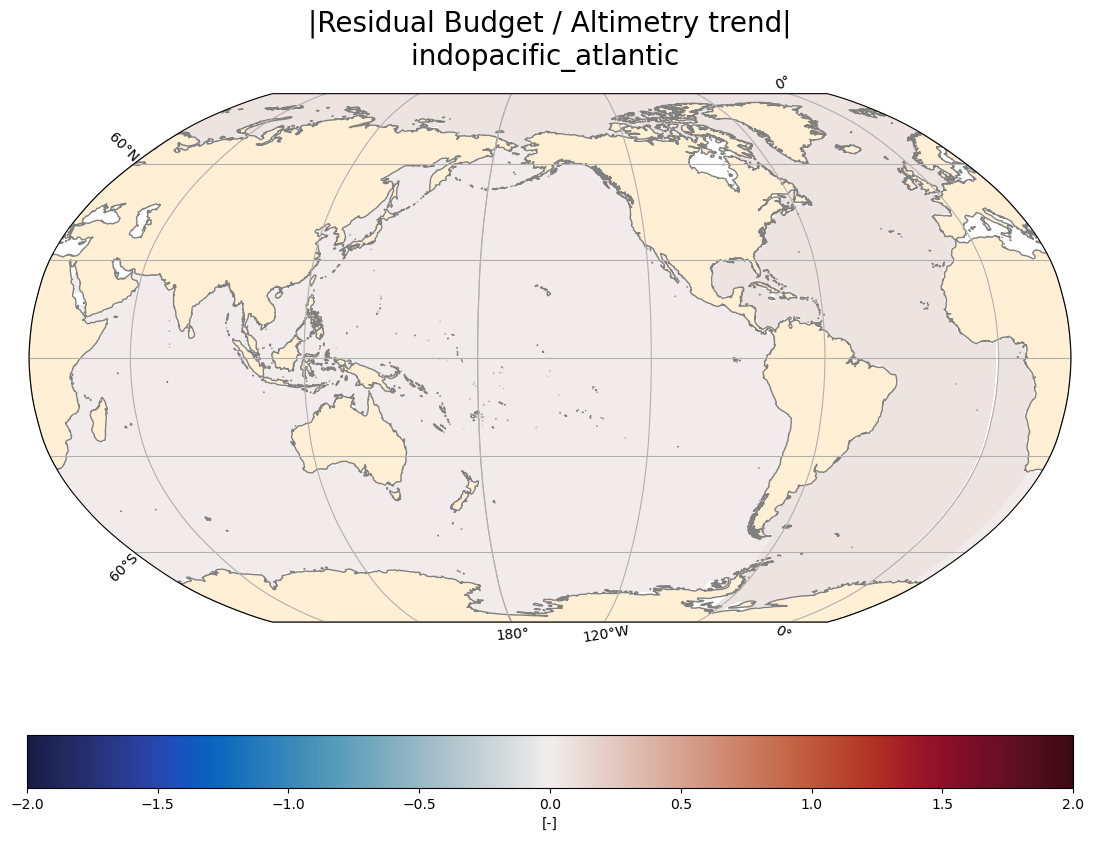

In [3]:
path = '/Users/ccamargo/Desktop/budget/regions/basins/'
file = 'ocean_basins_mask_v7.nc'

ds=xr.open_dataset(path+file)
ds

basins=['indopacific','atlantic']
maskb = np.zeros((len(basins),len(ds.lat),len(ds.lon)))
for i,bas in enumerate(basins):
    masktmp = np.array(ds[bas])
    masktmp[masktmp==0]=np.nan
    masktmp[np.isfinite(masktmp)]=i+1
    maskb[i,:,:]=np.array(masktmp)

maskb[np.isnan(maskb)]=0
mask=maskb.sum(axis=0)
plt.pcolor(mask)
plt.show()

n_basin = len(basins)
plt.figure(figsize=(20,10))
x=1;y=2
for i in range(n_basin):
    icluster = i+1
    ax = plt.subplot(x,y,icluster, projection = ccrs.Robinson(central_longitude=205))
    ax.set_global()
    maskb=np.array(mask)
    maskb[np.where(maskb!=icluster)]=np.nan
    mm = ax.pcolormesh(ds.lon,\
                       ds.lat,\
                       maskb,
                       vmin=0, vmax=x*y, 
                       transform=ccrs.PlateCarree(),
                       #cmap='Spectral_r'
                       cmap='jet'
                      )
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', 
                                                edgecolor='gray', facecolor='papayawhip'))
    plt.title('Basin {}'.format(icluster))

clim=2
ts=np.zeros((len(var),len(da.time)))
tr=np.zeros((len(var)))
plt.figure(figsize=(20,10))
budget_cluster=np.full_like(mask,np.nan)
budget_res = np.full_like(mask,np.nan)
budget_noise=np.full_like(mask,np.nan)
for i in range(n_basin):
    icluster = i+1
    ax = plt.subplot(x,y,icluster, projection = ccrs.Robinson(central_longitude=205))
    ax.set_global()
    maskb=np.array(mask)
    maskb[np.where(maskb!=icluster)]=np.nan
    maskb[np.isfinite(maskb)]=1
    ampl = np.abs(np.nanmax(da.sla[:,:,:,0]*maskb) - np.nanmin(da.sla[:,:,:,0]*maskb))
    plt.subplot(x,y,icluster)
    # plt.subplot(111)
    for ivar in range(len(var)):
        ts[ivar,:] = cluster_mean(np.array(da.sla[:,:,:,ivar]), maskb,time=da.time,lat=da.lat,lon=da.lon)
        out = sl.get_OLS_trend(tdec,ts[ivar])
        tr[ivar]=out[0]
        plt.plot(ts[ivar,:],label='{}: {} '.format(var[ivar],np.round(tr[ivar],3)))
    plt.legend()

    res= np.array(tr[0] - (tr[1]+tr[2]))
    budget_cluster[np.where(maskb==1)] = res
    # print(res)
    budget_res[np.where(maskb==1)] = (res /ampl)
    budget_noise[np.where(maskb==1)]= np.array(res/tr[0])
    # plt.title('Basin {}'.format(icluster))
    plt.title('Basin {}: {} mm/yr'.format(icluster,np.round(res,3)))

plt.show()

fname='indopacific_atlantic'
plot_map(budget_cluster,lon0=205,fsize=(15,10),cmap=cmap,
     title='Residual Budget at each Basin \n{}'.format(fname),cmax=clim,cmin=-clim,clabel='mm/yr')

newcmap = cmocean.tools.crop(cmocean.cm.curl, -clim, clim, 1)
# budget_noise = np.abs(np.array(budget_cluster/global_trend[0]))

plot_map(budget_noise,lon0=205,fsize=(15,10),cmap=cmap,
         title='Residual Budget / Altimetry trend\n{} '.format(fname),cmax=clim,cmin=-clim,clabel='[-]')

plot_map(np.abs(budget_noise),lon0=205,fsize=(15,10),cmap=newcmap,
         title='|Residual Budget / Altimetry trend|\n{} '.format(fname),cmax=clim,cmin=-clim,clabel='[-]')

plot_map(np.abs(budget_noise),lon0=205,fsize=(15,10),cmap=cmap,
         title='|Residual Budget / Altimetry trend|\n{} '.format(fname),cmax=clim,cmin=-clim,clabel='[-]')


#plot_map_contour(budget_cluster,contour,lon0=205,fsize=(15,10),cmap=cmap,
#         title='Residual Budget at each cluster',cmax=clim,cmin=-clim,clabel='mm/yr')



# Budget on Thompson & Merrifield basins

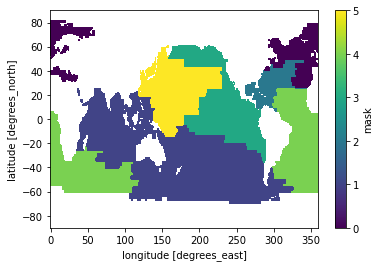

In [4]:
path = '/Users/ccamargo/Desktop/budget/regions/basins/'
file = 'ocean_regions_thompson_360x180_corrected.nc'

ds=xr.open_dataset(path+file)
ds
ds.mask.plot()
plt.show()


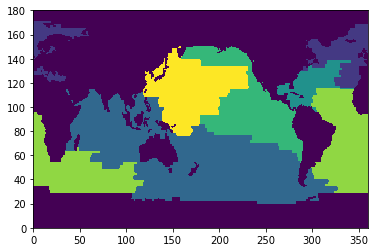

In [5]:
basins = ['subpolar_north_atlantic','indian_south_pacific','subtropical_north_atlantic',
          'east_pacific','south_atlantic','northwest_pacific'
         ]
maskb = np.zeros((len(basins),len(ds.lat),len(ds.lon)))
for i,bas in enumerate(basins):
    masktmp = np.array(ds.mask)
    masktmp[masktmp!=i]=np.nan
    masktmp[np.isfinite(masktmp)]=i+1
    maskb[i,:,:]=np.array(masktmp)

maskb[np.isnan(maskb)]=0
mask=maskb.sum(axis=0)
plt.pcolor(mask)
plt.show()

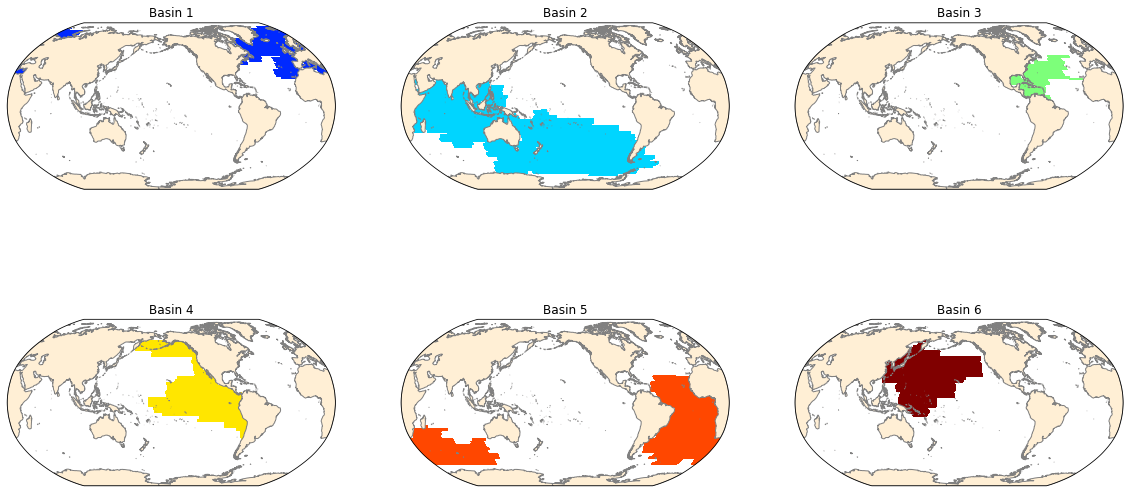

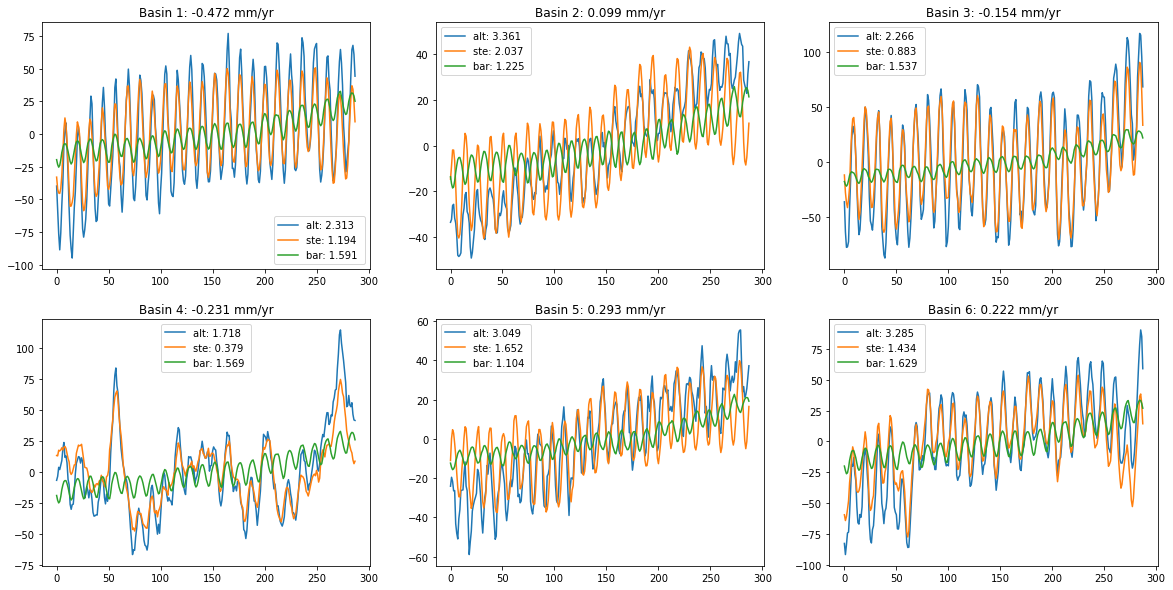

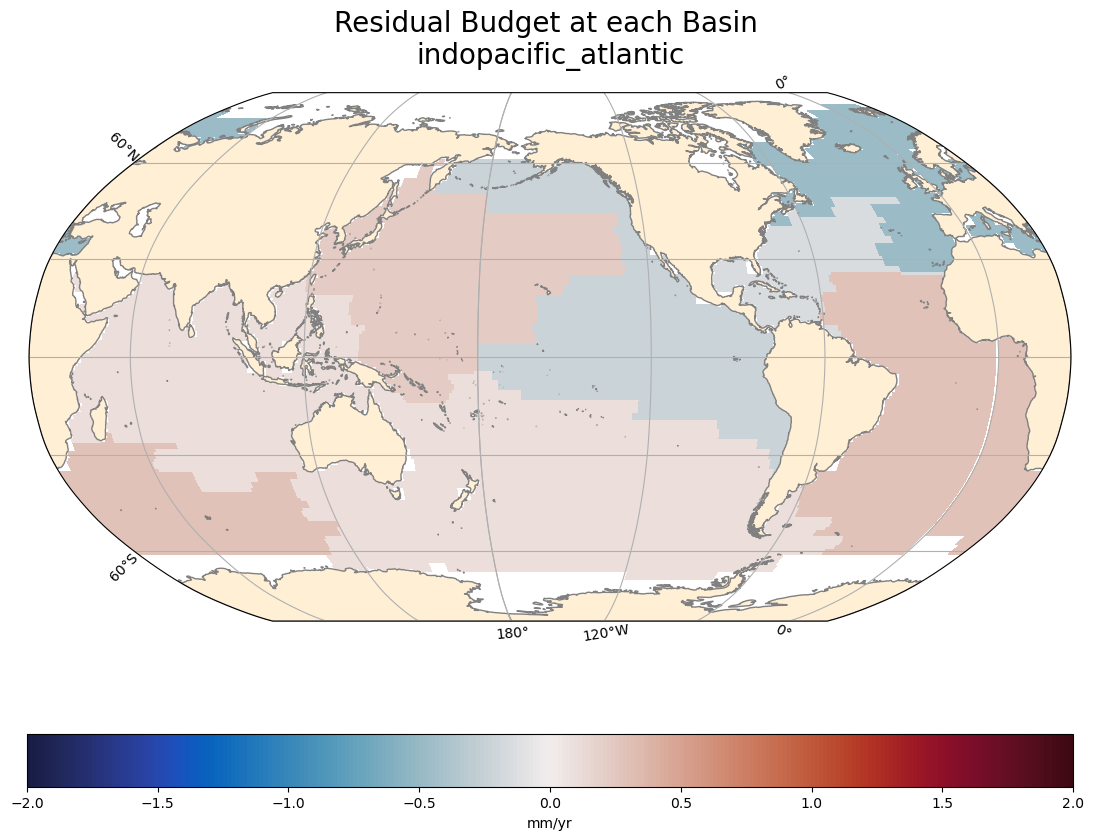

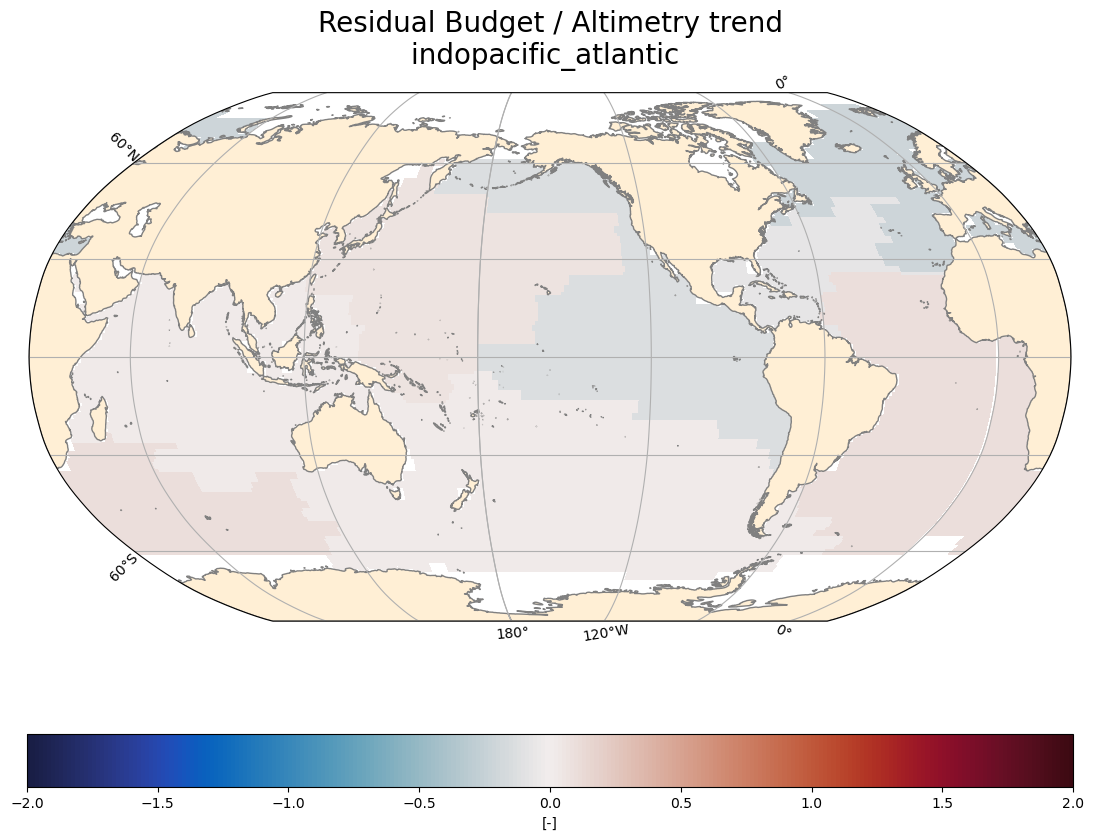

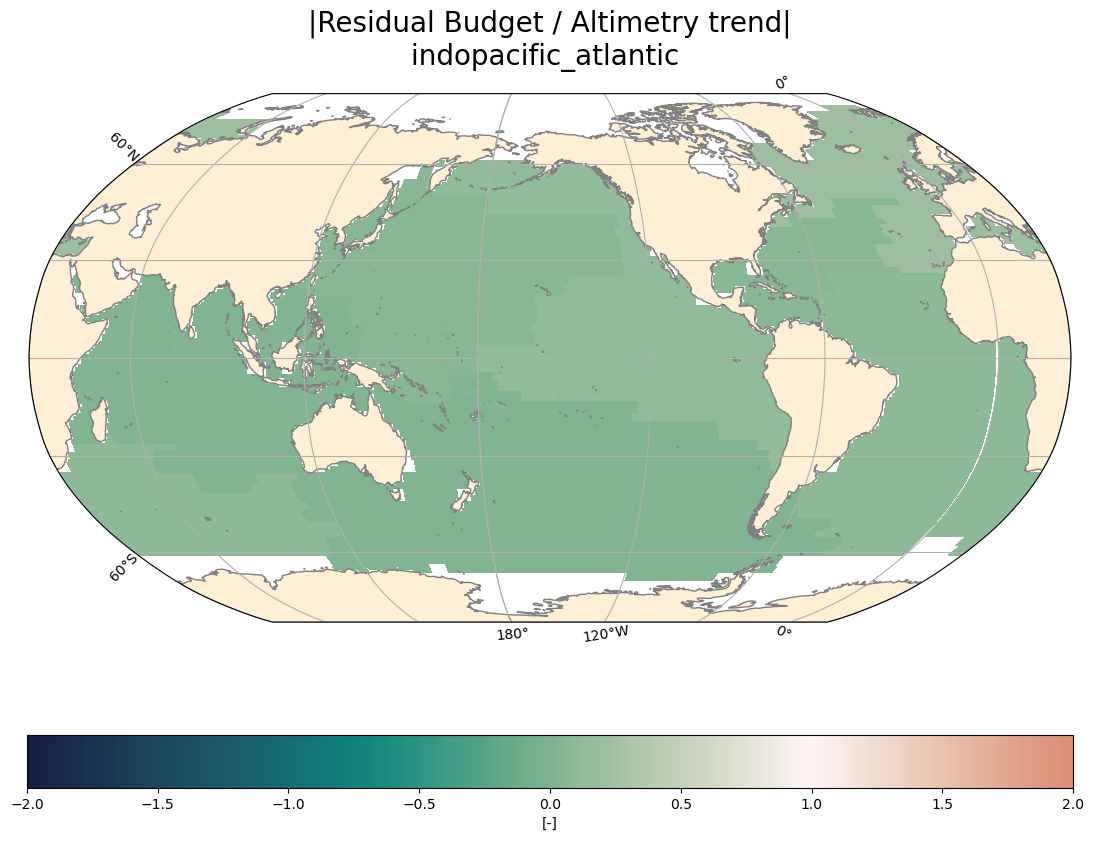

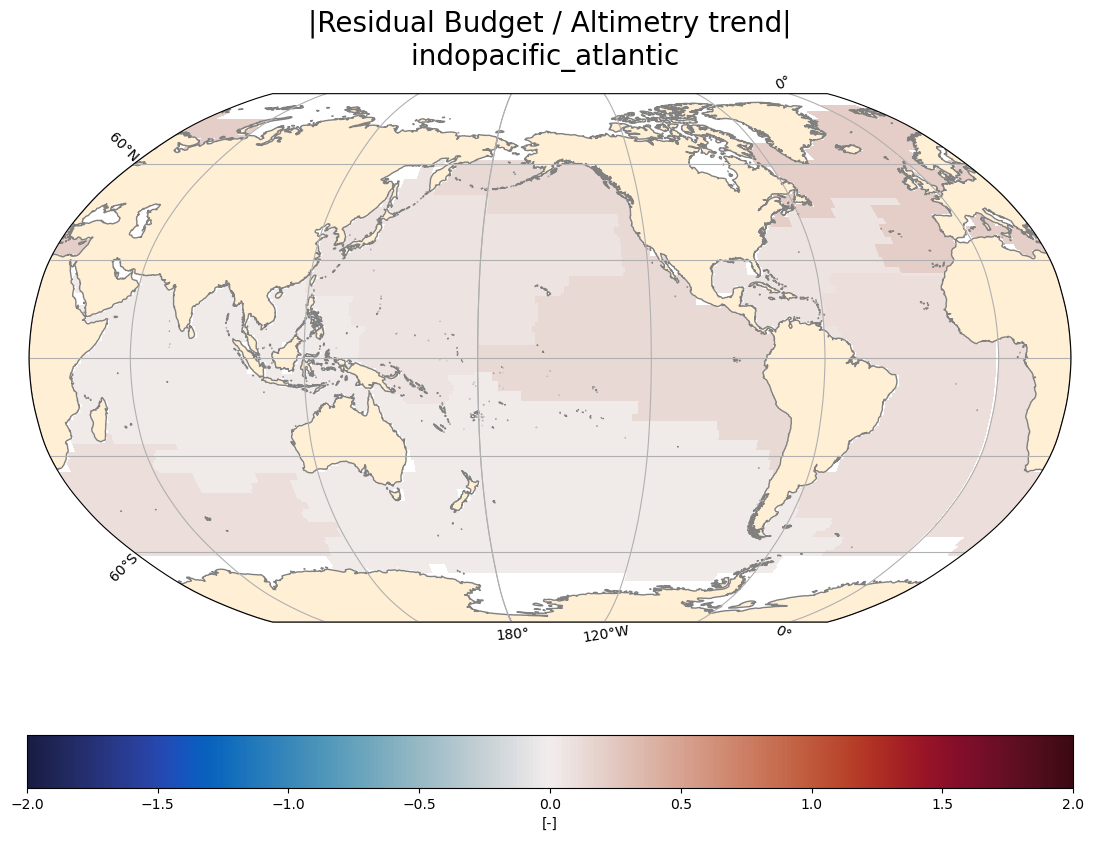

In [6]:
n_basin = len(basins)
plt.figure(figsize=(20,10))
x=2;y=3
for i in range(n_basin):
    icluster = i+1
    ax = plt.subplot(x,y,icluster, projection = ccrs.Robinson(central_longitude=205))
    ax.set_global()
    maskb=np.array(mask)
    maskb[np.where(maskb!=icluster)]=np.nan
    mm = ax.pcolormesh(ds.lon,\
                       ds.lat,\
                       maskb,
                       vmin=0, vmax=x*y, 
                       transform=ccrs.PlateCarree(),
                       #cmap='Spectral_r'
                       cmap='jet'
                      )
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', 
                                                edgecolor='gray', facecolor='papayawhip'))
    plt.title('Basin {}'.format(icluster))

clim=2
ts=np.zeros((len(var),len(da.time)))
tr=np.zeros((len(var)))
plt.figure(figsize=(20,10))
budget_cluster=np.full_like(mask,np.nan)
budget_res = np.full_like(mask,np.nan)
budget_noise=np.full_like(mask,np.nan)
for i in range(n_basin):
    icluster = i+1
    ax = plt.subplot(x,y,icluster, projection = ccrs.Robinson(central_longitude=205))
    ax.set_global()
    maskb=np.array(mask)
    maskb[np.where(maskb!=icluster)]=np.nan
    maskb[np.isfinite(maskb)]=1
    ampl = np.abs(np.nanmax(da.sla[:,:,:,0]*maskb) - np.nanmin(da.sla[:,:,:,0]*maskb))
    plt.subplot(x,y,icluster)
    # plt.subplot(111)
    for ivar in range(len(var)):
        ts[ivar,:] = cluster_mean(np.array(da.sla[:,:,:,ivar]), maskb,time=da.time,lat=da.lat,lon=da.lon)
        out = sl.get_OLS_trend(tdec,ts[ivar])
        tr[ivar]=out[0]
        plt.plot(ts[ivar,:],label='{}: {} '.format(var[ivar],np.round(tr[ivar],3)))
    plt.legend()
    
    res= np.array(tr[0] - (tr[1]+tr[2]))
    budget_cluster[np.where(maskb==1)] = res
    # print(res)
    budget_res[np.where(maskb==1)] = (res /ampl)
    budget_noise[np.where(maskb==1)]= np.array(res/tr[0])
    plt.title('Basin {}: {} mm/yr'.format(icluster,np.round(res,3)))
plt.show()

fname='indopacific_atlantic'
plot_map(budget_cluster,lon0=205,fsize=(15,10),cmap=cmap,
     title='Residual Budget at each Basin \n{}'.format(fname),cmax=clim,cmin=-clim,clabel='mm/yr')

newcmap = cmocean.tools.crop(cmocean.cm.curl, -clim, clim, 1)
# budget_noise = np.abs(np.array(budget_cluster/global_trend[0]))

plot_map(budget_noise,lon0=205,fsize=(15,10),cmap=cmap,
         title='Residual Budget / Altimetry trend\n{} '.format(fname),cmax=clim,cmin=-clim,clabel='[-]')

plot_map(np.abs(budget_noise),lon0=205,fsize=(15,10),cmap=newcmap,
         title='|Residual Budget / Altimetry trend|\n{} '.format(fname),cmax=clim,cmin=-clim,clabel='[-]')

plot_map(np.abs(budget_noise),lon0=205,fsize=(15,10),cmap=cmap,
         title='|Residual Budget / Altimetry trend|\n{} '.format(fname),cmax=clim,cmin=-clim,clabel='[-]')


#plot_map_contour(budget_cluster,contour,lon0=205,fsize=(15,10),cmap=cmap,
#         title='Residual Budget at each cluster',cmax=clim,cmin=-clim,clabel='mm/yr')

